In [1]:
import pandas as pd
pd.set_option('max_colwidth',150)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from string import punctuation
import re
import os
from sklearn.feature_extraction.text import CountVectorizer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell
import warnings
import pandas as pd
pd.options.plotting.backend = "plotly"
warnings.filterwarnings("ignore")
%matplotlib inline

# Download and Extract the Datasets

In [ ]:
# Downloading all-the-news-2-news-articles-dataset 
! wget https://www.dropbox.com/s/cn2utnr5ipathhh/all-the-news-2-1.zip?dl=0

# Downloading Annotated Corpus for Named Entity Recognition dataset
!gdown https://drive.google.com/uc?id=13y8JNgL5TQ4x-yufpBOv3QBsEiE051sE

# Make a data folder to store the data
!mkdir data

!unzip /content/all-the-news-2-1.zip?dl=0 -d ./data/

!mv /content/ner.csv ./data

!rm /content/all-the-news-2-1.zip?dl=0



# Load Data

In [3]:
#specify the path to data location

filepath = '/content/data/all-the-news-2-1.csv'
# data = pd.read_csv(filepath, encoding = "ISO-8859-1")
data = pd.read_csv(filepath, encoding = "utf-8")  


In [4]:
#Verify that the data is loaded correctly
data.head(3)

,date,year,month,day,author,title,article,url,section,publication
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of liberal democracy seriously,"This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to de...",https://www.vox.com/polyarchy/2016/12/9/13898340/democracy-warning-signs,NaN,Vox
1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contract makes it difficult to build the team,"The Indianapolis Colts made Andrew Luck the highest-paid player in NFL history this offseason with a five-year, $122-million contract with $89 mi...",https://www.businessinsider.com/colts-gm-ryan-grigson-andrew-luck-contract-2016-10,NaN,Business Insider
2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President Donald Trump denied a report on Friday that he had ordered Special Counsel Robert Mueller fired last...",https://www.reuters.com/article/us-davos-meeting-trump-mueller/trump-denies-report-he-ordered-mueller-fired-idUSKBN1FF12A,Davos,Reuters


In [5]:
#totally the data have 2,688,878 rows and 10 columns
data.shape

(2688878, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688878 entries, 0 to 2688877
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   year         int64  
 2   month        float64
 3   day          int64  
 4   author       object 
 5   title        object 
 6   article      object 
 7   url          object 
 8   section      object 
 9   publication  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 205.1+ MB


In [7]:
data.isnull().sum()

date                 0
year                 0
month                0
day                  0
author         1021101
title               37
article         104713
url              12577
section         912273
publication      12577
dtype: int64

# Observation about the all-the-news-data

- The data has 10 columns and 2688878 rows
- 6 columns of the data have null values. The columns name are: 
     - author(it has 1021101 null values)
     - title(it has 37 null values)
     - article(it has 104713 null values)
     - url(it has 12577 null values)
     - section(it has 912223 null values)
- data type of the columns int(2), float(1), and object(7)
- The 'date' column data type is Object. It should be converted into date data type
-author, title, article, url, section, and publication columns have object data types. it should be converted into string


In [8]:
# the total number of count for each publication
data['publication'].value_counts(dropna=False)

Reuters               840094
The New York Times    252259
CNBC                  238096
The Hill              208411
People                136488
CNN                   127602
Refinery 29           111433
Vice                  101137
Mashable               94107
Business Insider       57953
The Verge              52424
TechCrunch             52095
TMZ                    49595
Axios                  47815
Vox                    47272
Politico               46377
Washington Post        40882
Buzzfeed News          32819
Gizmodo                27228
Economist              26227
Wired                  20243
Fox News               20144
Vice News              15539
Hyperallergic          13551
NaN                    12577
New Republic           11809
New Yorker              4701
Name: publication, dtype: int64

In [9]:
data['section'].value_counts(dropna=False)[:50]

NaN                          912273
Market News                  108724
World News                   108651
Business News                 96395
Wires                         67352
Financials                    57845
politics                      53496
us                            51242
Intel                         39805
Bonds News                    39672
Politics                      33875
Healthcare                    30883
world                         28530
opinion                       27465
Consumer Goods and Retail     26766
Sports News                   26324
business                      25335
tv                            24783
sports                        23909
Tech                          21605
arts                          21230
movies                        19683
Commodities                   17620
Deals                         15847
style                         15355
Tech by VICE                  15222
Entertainment                 13773
health                      

In [10]:
def filter_section(section):

  if str(section).lower().startswith('tech') :
    return 'technology'
  elif str(section).lower().startswith('health'):
    return 'health'

  return 'other'

In [11]:
data['tech_health_tag'] = data['section'].apply(filter_section)

In [12]:
data['tech_health_tag'].value_counts()

other         2562768
health          65261
technology      60849
Name: tech_health_tag, dtype: int64

# Load the data which focus only on Health and Technology Section

In [13]:
data_tech_health = data[(data['tech_health_tag']=='technology') |  (data['tech_health_tag']=='health')]

In [14]:
data_tech_health = data_tech_health.reset_index(drop=True)

In [15]:
data_tech_health.head(3)

,date,year,month,day,author,title,article,url,section,publication,tech_health_tag
0,2018-05-02 17:09:00,2018,5.0,2,Caroline Williams,You Can Trick Your Brain Into Being More Focused,If only every day could be like this. You can’t put your finger on why: Maybe you had just the right amount of sleep. Maybe the stars are somehow ...,https://www.vice.com/en_us/article/9kgp4v/how-to-improve-focus-be-more-creative,Health,Vice,health
1,2018-10-05 19:35:00,2018,10.0,5,Caroline Haskins,Trash Geyser Spews Garbage In Yellowstone National Park,"Geyser eruptions are known as one of the most beautiful events to occur in nature. Not anymore! On September 15, Yellowstone Park’s Ear Spring ge...",https://www.vice.com/en_us/article/evwq47/ear-spring-geyser-spews-trash-in-yellowstone-national-park,Tech by VICE,Vice,technology
2,2019-06-20 00:00:00,2019,6.0,20,Gergely Szakacs,"Hungary has no evidence of Huawei threat, plans rapid 5G rollout: minister","BUDAPEST (Reuters) - Hungary has no evidence that equipment from Chinese telecoms giant Huawei poses a security threat, a government minister said...",https://www.reuters.com/article/us-hungary-telecoms-5g-huawei/hungary-has-no-evidence-of-huawei-threat-plans-rapid-5g-rollout-minister-idUSKCN1TL2AP,Technology News,Reuters,technology


In [16]:
data_tech_health.shape

(126110, 11)

In [17]:
data_tech_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126110 entries, 0 to 126109
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             126110 non-null  object 
 1   year             126110 non-null  int64  
 2   month            126110 non-null  float64
 3   day              126110 non-null  int64  
 4   author           63297 non-null   object 
 5   title            126109 non-null  object 
 6   article          125948 non-null  object 
 7   url              126110 non-null  object 
 8   section          126110 non-null  object 
 9   publication      126110 non-null  object 
 10  tech_health_tag  126110 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 10.6+ MB


In [18]:
data_tech_health.isnull().sum()

date                   0
year                   0
month                  0
day                    0
author             62813
title                  1
article              162
url                    0
section                0
publication            0
tech_health_tag        0
dtype: int64

**Observation the data focus on health and technology section**

- The data has 10 columns and 126110 rows
- 3 columns of the data have null values. The columns name are:
        - author(it has 62813 null values)
        - title(it has 1 null values)
        - article(it has 162 null values)
        
- data type of the columns int(2), float(1), and object(7)
- The 'date' column data type is Object. It should be converted into date data type
- author, title, article, url, section, and publication columns have object data types. it should be converted into string


In [19]:
data_tech_health['publication'].unique()

array(['Vice', 'Reuters', 'The Verge', 'People', 'Economist', 'CNN',
       'Gizmodo', 'CNBC', 'Fox News', 'The New York Times'], dtype=object)

<Figure size 720x360 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

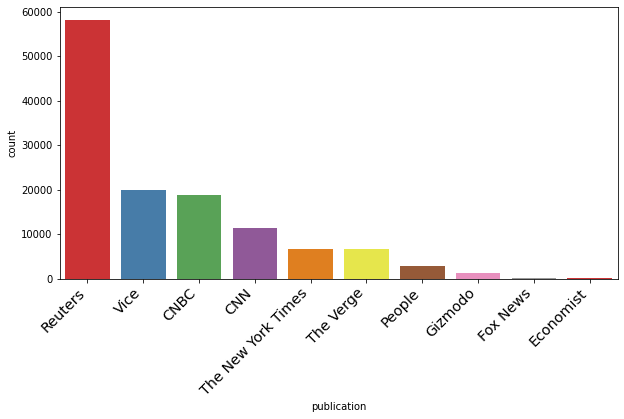

In [20]:
plt.figure(figsize=(10,5))
publication_plot = sns.countplot(
    data=data_tech_health,
    x='publication',
    palette='Set1',
    order = data_tech_health['publication'].value_counts().index
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# observation 
- From the above chart, we can see that most of articles contain health and technology articles published by 10 publishers. Their name is as follows:
   - Reuters
   - Vice
   - CNBC
   - CNN
   - The New York Times
   - The Verg
   - People
   - Gizmodo
   - Fox News
   - Economist
  
- Reuter take the first position by far publishing Tech and Health articles

- Economist take the last position publishing on this domain.



In [21]:
data_tech_health['tech_health_tag'].value_counts()

health        65261
technology    60849
Name: tech_health_tag, dtype: int64

In [22]:
def plot_figure(column_name1,column_name2):

  plt.figure(figsize=(12,8))
  publication_plot = sns.countplot(
      data=data_tech_health,
      x=column_name1,
      hue = column_name2,
      palette='Set1',
      order = data_tech_health[column_name1].value_counts().index
  )

  plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='x-large'  
  )
  plt.show()


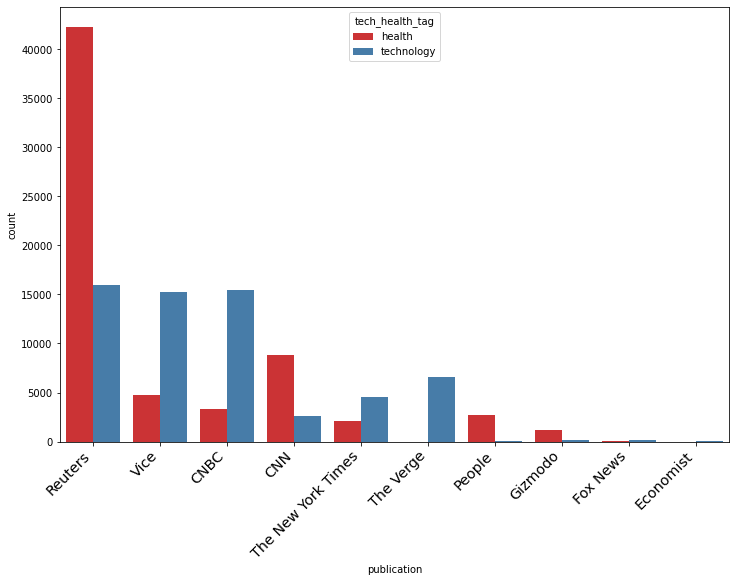

In [23]:
plot_figure('publication','tech_health_tag') 

# observation 
- From the above chart, we can see that most of articles talking about health news coming from Reuters. The other publisher contirbute much less when compare with reuters.

- Regarding to Technology articles the 3 publishers. i.e Reuters, Vice and CNBC contirbute almost equally.

- Economist,FoxNews and Gizzmodo contirbute much less when compare with others.



In [24]:
data_tech_health['year'].value_counts().sort_index()

2016    24470
2017    28697
2018    24770
2019    22961
2020    25212
Name: year, dtype: int64

In [25]:
data_tech_health['month'].value_counts()

3.0     24510
2.0     15218
1.0     10921
10.0     9050
4.0      8875
5.0      8789
11.0     8643
6.0      8577
7.0      8190
8.0      8094
9.0      8055
12.0     7188
Name: month, dtype: int64

In [51]:
data_tech_health[data_tech_health['year']==2020]['month'].unique()


array([1., 2., 3., 4.])

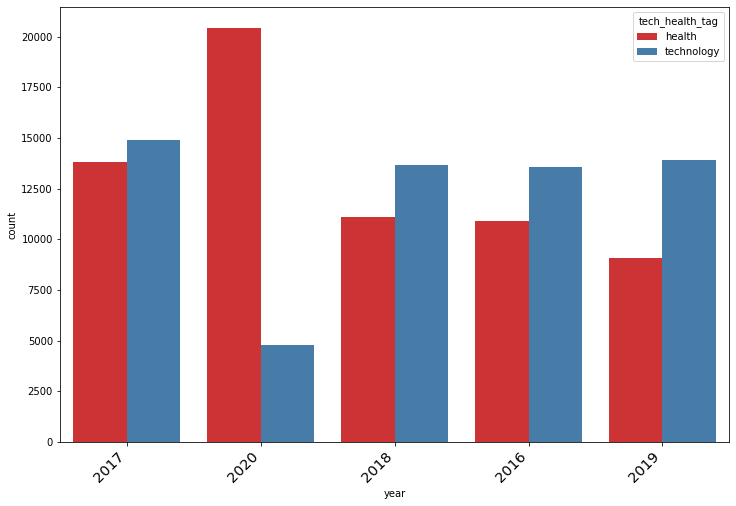

In [26]:
plot_figure('year','tech_health_tag') 

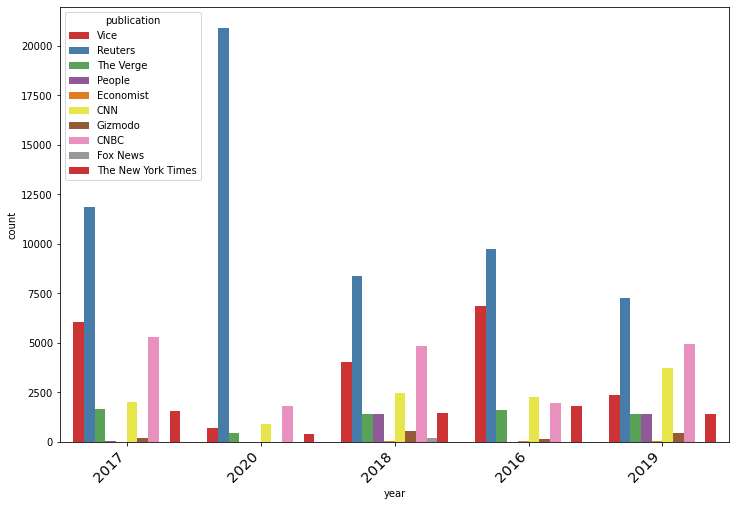

In [27]:
plot_figure('year','publication') 


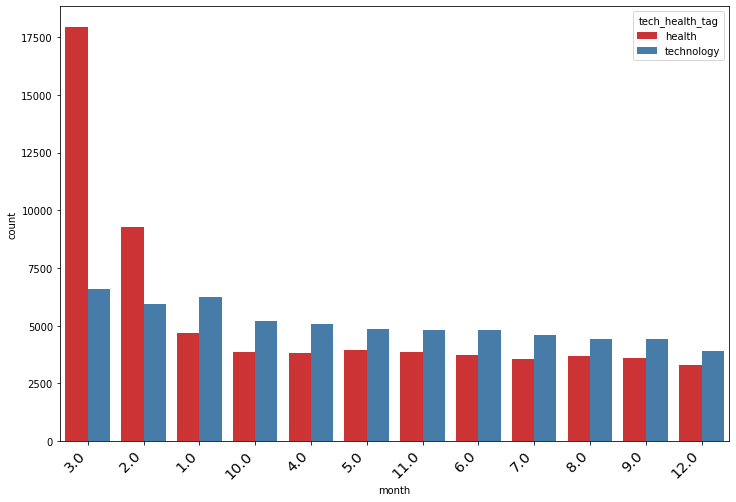

In [28]:
plot_figure('month','tech_health_tag') 


## Observation
- The highest number of articles published in 2017

- The highest number of health article published in 2020. The reason for this might be related to beginning of Covid pandamic in 2020.

- 2020 has only 4 covered months record.

- The highest publication of articles both in health and technology occur in month of January, February and March.

- The first time the number of health article greater than in technology article is in year of 2020.

- Reuters is the leading article publisher in in technology and health articles.

    


## Data Cleaning

In [29]:
def processed_text_article(df):
    special_char = list(punctuation)
    for e in ['.','?']:
        special_char.remove(e)
    special_char.append("\n+")
    special_char.append("\s+")

    def deep_clean(text_str):
      text_str = str(text_str)
      text_str =text_str.strip()
      text_str = re.sub('<[^>]*>', '', text_str)
      for char in special_char:
          text_str = text_str.replace(char, '')
      return text_str

    df['article'] = df['article'].apply(deep_clean)
    df['title'] = df['title'].apply(deep_clean)
    return df

def clean_dataFrame(df):
  missing_cols = df.isnull().sum()
  drop_missing_cols = missing_cols[(missing_cols > len(df)/20)].sort_values()
  df = df.drop(drop_missing_cols.index, axis=1)
  df['date'] = pd.to_datetime(df['date'])
  df = df.dropna()
  #reset index
  df = df.reset_index(drop=True)
  # make all columns lower_case 
  df.columns = df.columns.str.lower()
  df = processed_text_article(df)
  return df

In [30]:
data_tech_health = clean_dataFrame(data_tech_health)

In [31]:
data_tech_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125948 entries, 0 to 125947
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             125948 non-null  datetime64[ns]
 1   year             125948 non-null  int64         
 2   month            125948 non-null  float64       
 3   day              125948 non-null  int64         
 4   title            125948 non-null  object        
 5   article          125948 non-null  object        
 6   url              125948 non-null  object        
 7   section          125948 non-null  object        
 8   publication      125948 non-null  object        
 9   tech_health_tag  125948 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 9.6+ MB


In [32]:
data_tech_health.isnull().sum()

date               0
year               0
month              0
day                0
title              0
article            0
url                0
section            0
publication        0
tech_health_tag    0
dtype: int64

In [33]:
data_tech_health['date'].describe()

count                  125948
unique                  29195
top       2020-03-16 00:00:00
freq                     1021
first     2016-01-01 00:00:00
last      2020-04-01 05:00:32
Name: date, dtype: object

- The statistical summery of date tells us the year 2020 only includes 4 month record.

## The distribution of word count of article text

In [34]:
data_tech_health['word_count'] = data_tech_health['article'].apply(lambda x: len(x.split()))

In [35]:
data_tech_health['word_count'].describe([0.1,0.25,0.5,0.75,0.95])

count    125948.000000
mean        467.384428
std         502.197501
min           1.000000
10%          42.000000
25%         113.000000
50%         351.000000
75%         629.000000
95%        1340.000000
max       13510.000000
Name: word_count, dtype: float64

In [36]:
data_tech_health[data_tech_health['word_count']<10]['article'].count()

13

In [38]:
data_tech_health[data_tech_health['word_count']>1000]['article'].count()

13944

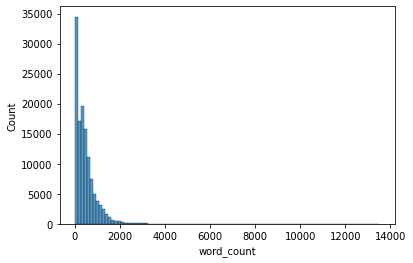

In [39]:
sns.histplot(data_tech_health['word_count'],
                 bins=100)




- The word count of an article text is between 1 and 13510. 
- 75% of the data word count is 629. 
- There are 13 articles their word count is less than 10 and 13944 article
their word count is above 1000.

## The distribution of top unigrams before removing stop words



In [40]:
def get_top_n_words(corpus, n=None, language=None):
  if language=='english':
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
  else:
    vec = CountVectorizer().fit(corpus)

  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]


In [41]:
common_words = get_top_n_words(data_tech_health['article'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ArticleWord' , 'count'])
df1.groupby('ArticleWord').sum()['count'].sort_values(ascending=False).plot.bar()

the 3020552
to 1750126
of 1482657
and 1435060
in 1171664
that 769151
for 621677
is 549682
it 503883
on 496834
with 415156
said 399219
as 350386
by 309276
are 300474
be 288955
at 283582
was 281389
have 280537
from 274870


## The distribution of top unigrams for article after removing stop words


In [42]:
common_words = get_top_n_words(data_tech_health['article'], 20, 'english')
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ArticleWord' , 'count'])
df1.groupby('ArticleWord').sum()['count'].sort_values(ascending=False).plot.bar()

said 399219
people 160781
company 149141
new 147966
like 123928
health 103557
year 94077
million 83302
time 81934
just 80520
reuters 71136
percent 68678
says 68267
years 68061
according 65309
data 64223
use 61889
companies 61447
study 58246
told 57231


## The distribution of top unigrams for technology article after removing stop words


In [43]:
data_tech = data_tech_health[data_tech_health['tech_health_tag']=='technology']
common_words = get_top_n_words(data_tech['article'], 25, 'english')
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ArticleWord' , 'count'])
df1.groupby('ArticleWord').sum()['count'].sort_values(ascending=False).plot.bar()

said 196930
company 103870
new 88415
like 75975
people 67400
year 54580
facebook 52901
companies 50118
data 46365
time 44805
just 44216
apple 43290
million 42103
google 39642
technology 39362
years 36886
billion 36323
use 34937
amazon 34818
according 34442
make 34291
percent 34253
told 33992
users 33558
business 29491


## The distribution of top unigrams for health article after removing stop words

In [44]:
data_health = data_tech_health[data_tech_health['tech_health_tag']=='health']
common_words = get_top_n_words(data_health['article'], 25, 'english')
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ArticleWord' , 'count'])
df1.groupby('ArticleWord').sum()['count'].sort_values(ascending=False).plot.bar()

said 202289
people 93381
health 92199
new 59551
study 49691
like 47953
reuters 47870
says 46654
company 45271
patients 43098
million 41199
year 39497
time 37129
just 36304
percent 34425
drug 32606
disease 32016
years 31175
according 30867
women 30163
medical 29956
coverage 29808
source 28869
cases 28597
care 28080


## The distribution of top bigrams for technology articles after removing stop words




In [45]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [46]:
common_words = get_top_n_bigram(data_tech['article'], 25)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ArticleWord' , 'count'])
df1.groupby('ArticleWord').sum()['count'].sort_values(ascending=False).plot.bar()

new york 13277
united states 12400
social media 9574
chief executive 7421
company said 7087
said statement 7086
san francisco 6745
silicon valley 6236
tech companies 5544
artificial intelligence 4896
years ago 4655
told motherboard 4561
told cnbc 4364
declined comment 4233
law enforcement 3988
climate change 3842
wall street 3691
vice president 3613
said company 3549
earlier year 3447
york times 3374
told reuters 3276
companies like 3206
blog post 3043
stories day 3024


## The distribution of top bigrams for health articles after removing stop words

In [47]:
common_words = get_top_n_bigram(data_health['article'], 25)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ArticleWord' , 'count'])
df1.groupby('ArticleWord').sum()['count'].sort_values(ascending=False).plot.bar()

company coverage 23200
source text 22588
text eikon 15082
eikon company 14450
united states 13418
new york 10856
public health 9662
health care 7765
said dr 7505
said statement 6354
mental health 6159
disease control 5751
centers disease 5444
control prevention 5030
food drug 4841
new study 4757
reuters health 4676
drug administration 4648
year ago 4597
gdynia newsroom 4488
health officials 4377
world health 4028
health organization 3744
said email 3612
health insurance 3487


## Conclusions:

- The above explanatory data analysis proof that we have enough data for both technology and health articles to implement topic modeling algorithm.

- Even though 2020 has only covered 4 months data, it has the highest number of articles published related to health. The reason being COVID-19 pandamic.

- The EDA shows that there are articles with few numbers of word counts, these needs to be cleaned as these articles might not have a complete sentence.

- Reuters is the leading publisher when it come into health and technology articles

# Data Lineage

Our data was obtained from the two data sets on Kaggle.

The first data set contains more than 2.5 million news articles and essays from 27 publications. The articles are from January 2016 to April 2020. This data set is located here:[ news articles data.](https://components.one/datasets/all-the-news-2-news-articles-dataset/
)

The second data set is a corpus for named entity recognition, also obtained from Kaggle. The data is located here :[NER corpus](https://www.kaggle.com/datasets/abhinavwalia95/entity-annotated-corpus)


## Questions

- We need some kind of guidance about to make a connection between NER application and Topic Modeling application. because the data given us is completely different.



## Acknowledgements

- The code get_top_n_bigram is adapted from [towardsdatascience](https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a)